In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
#loading the datasets
product_df = pd.read_csv('C:\\Users\\Dazzlinggem\\Desktop\\Excel\\Day 3\\amazon_products.csv')
category_df = pd.read_csv('C:\\Users\\Dazzlinggem\\Desktop\\Excel\\Day 3\\amazon_categories.csv')


          asin                                              title  \
0   B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...   
1   B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...   
2   B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...   
3   B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...   
4   B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...   
..         ...                                                ...   
95  B07YH2XB8B                          Subterra Carry On Spinner   
96  B0BPS6ZSZ9  Luggage PC ABS Hardside Lightweight Suitcase w...   
97  B0BFQLJVM1  20 Inch Carry On with Front Pocket, 22x14.6x10...   
98  B09QYJ9TLJ  Grace Luggage, 28” Hardside Suitcase, ABS+PC H...   
99  B0B3HZPKMS  19 Degree Short Trip Expandable 4 Wheeled Pack...   

                                               imgUrl  \
0   https://m.media-amazon.com/images/I/815dLQKYIY...   
1   https://m.media-amazon.com/images/I/81bQlm7vf6...   


In [8]:
# print(product_df.head(100))
print(product_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB
None


In [6]:
print(product_df.isnull().sum())

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


In [16]:
product_df[product_df['title'].isnull()]

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
1206102,B00758A9CE,NaN,https://m.media-amazon.com/images/I/71+50RU8o2...,https://www.amazon.com/dp/B00758A9CE,5.0,0,33.08,0.0,19,False,0


In [18]:
product_df= product_df.dropna(subset=['title'])
print(product_df.isnull().sum())

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


# Data Description

In [10]:
# the dataset has a tototal of 1426337 rows and 11 columns. all columns are complete except the Title column which has
# one null field.
# after confirming that the row with null cannot affect the analysis, a decision was made nto remove the row.


In [43]:
# Descriptive Analysis

print(product_df.describe())


              stars       reviews         price     listPrice   category_id  \
count  1.426336e+06  1.426336e+06  1.426336e+06  1.426336e+06  1.426336e+06   
mean   3.999511e+00  1.807509e+02  4.337541e+01  1.244917e+01  1.237410e+02   
std    1.344293e+00  1.761454e+03  1.302893e+02  4.611200e+01  7.311271e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    4.100000e+00  0.000000e+00  1.199000e+01  0.000000e+00  6.500000e+01   
50%    4.400000e+00  0.000000e+00  1.995000e+01  0.000000e+00  1.200000e+02   
75%    4.600000e+00  0.000000e+00  3.599000e+01  0.000000e+00  1.760000e+02   
max    5.000000e+00  3.465630e+05  1.973181e+04  9.999900e+02  2.700000e+02   

       boughtInLastMonth  
count       1.426336e+06  
mean        1.419824e+02  
std         8.362722e+02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         5.000000e+01  
max         1.000000e+05  


# EDA (Explorative Data Analysis)

In [3]:
# MERGING THE PRODUCT AND CATEGORY TABLES

merged_df = pd.merge(product_df,category_df, left_on='category_id', right_on='id', how='left')

# 1. Bestseller Analysis -->

In [5]:
bestsellers=merged_df[merged_df['isBestSeller']==True]
# print(bestsellers)
bestsellers

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name
924,B00W66LQFO,Men's Eversoft Cotton Stay Tucked Crew T-Shirt,https://m.media-amazon.com/images/I/513fraGQXW...,https://www.amazon.com/dp/B00W66LQFO,4.6,0,18.48,26.00,110,True,10000,110,Men's Clothing
925,B0C4RMF5PZ,Official Renaissance World Tour Merch Disco Co...,https://m.media-amazon.com/images/I/71Uxhfi5KQ...,https://www.amazon.com/dp/B0C4RMF5PZ,4.8,0,40.00,0.00,110,True,4000,110,Men's Clothing
933,B077ZMKWVM,"Men's Crew T-Shirts, Multipack, Style G1100",https://m.media-amazon.com/images/I/61Zf5AAGPW...,https://www.amazon.com/dp/B077ZMKWVM,4.6,0,18.99,0.00,110,True,8000,110,Men's Clothing
938,B07PH2VWX1,"Men's Coolzone Boxer Briefs, Moisture Wicking ...",https://m.media-amazon.com/images/I/81lHfvvXK0...,https://www.amazon.com/dp/B07PH2VWX1,4.6,0,19.59,24.49,110,True,5000,110,Men's Clothing
944,B01D2GRTIE,Men's Multi-Pack Mesh Ventilating Comfort Fit ...,https://m.media-amazon.com/images/I/61lxpudqRp...,https://www.amazon.com/dp/B01D2GRTIE,4.6,0,14.99,0.00,110,True,6000,110,Men's Clothing
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415016,B0007LCLPE,Pyle 2Way Custom Component Speaker System-6.5”...,https://m.media-amazon.com/images/I/812gPYS6xm...,https://www.amazon.com/dp/B0007LCLPE,4.0,0,44.99,47.99,26,True,0,26,Car Electronics & Accessories
1415072,B004S50ZB2,BOSS Audio Systems R1002 Riot Series Car Stere...,https://m.media-amazon.com/images/I/610Vz6PUFl...,https://www.amazon.com/dp/B004S50ZB2,4.1,0,35.41,56.00,26,True,0,26,Car Electronics & Accessories
1416949,B0BZVV2N8N,"Pickleball Paddles, USAPA Approved Fiberglass ...",https://m.media-amazon.com/images/I/71WQNbP6dW...,https://www.amazon.com/dp/B0BZVV2N8N,4.8,0,35.99,0.00,198,True,300,198,Sports & Fitness
1416996,B00HR1NBWE,Skechers Men's Afterburn M. Fit,https://m.media-amazon.com/images/I/81ivYs9jxt...,https://www.amazon.com/dp/B00HR1NBWE,4.4,0,40.00,74.00,198,True,200,198,Sports & Fitness


In [40]:
#bestsellers_by_cataegory=bestsellers['category_id'].value_counts()
category_counts = bestsellers.groupby('category_name').size().reset_index(name='bestseller_count')
# print(category_counts)
category_counts

,category_name,bestseller_count
0,Abrasive & Finishing Products,17
1,Accessories & Supplies,125
2,Additive Manufacturing Products,7
3,Arts & Crafts Supplies,14
4,"Arts, Crafts & Sewing Storage",9
...,...,...
217,Women's Watches,3
218,"Xbox 360 Games, Consoles & Accessories",10
219,"Xbox One Games, Consoles & Accessories",1
220,"Xbox Series X & S Consoles, Games & Accessories",4


In [39]:
# SORTING THE BESTSELLER CATEGORY IN DESCENDING ORDER

top_5_bestsellers=category_counts.sort_values(by='bestseller_count', ascending=False).head(10)
# print(top_5_bestsellers)
top_5_bestsellers

,category_name,bestseller_count
185,Sports & Fitness,483
93,Industrial & Scientific,404
9,Automotive Replacement Parts,368
108,Kitchen & Dining,279
187,Sports & Outdoors,259
195,Tools & Home Improvement,240
197,Toys & Games,240
213,Women's Clothing,164
138,Outdoor Recreation,150
11,Automotive Tools & Equipment,149


In [38]:
top_10_bestsellers=bestsellers[bestsellers['category_name'].isin(top_5_bestsellers['category_name'])][['title', 'category_name']]
# print(top_10_bestsellers)
top_10_bestsellers

,title,category_name
152503,"Dinosaur Toys,Create A Dinosaur World Road Rac...",Toys & Games
152547,"Tea Party Set for Little Girls,PRE-WORLD Princ...",Toys & Games
152561,"MindSprout Dino Blasters, Rocket Launcher for ...",Toys & Games
152568,TEMI Construction Truck Toys Cars for Toddlers...,Toys & Games
152576,Esjay Toddler Busy Board Montessori Toys for 1...,Toys & Games
...,...,...
1310589,"New Starter Brush Kit Compatible With Yamaha, ...",Automotive Replacement Parts
1310702,Right Front Differential Axle Intermediate Sha...,Automotive Replacement Parts
1416948,"Pickleball Paddles, USAPA Approved Fiberglass ...",Sports & Fitness
1416995,Skechers Men's Afterburn M. Fit,Sports & Fitness


In [27]:
merged_df['percentage_discount']=((merged_df['listPrice']-merged_df['price'])/merged_df['listPrice'])*100
merged_df_=merged_df
merged_df_

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name,percentage_discount
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,104,Suitcases,-inf
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,104,Suitcases,19.048526
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,104,Suitcases,15.000349
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,104,Suitcases,17.715947
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,104,Suitcases,43.549792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426332,B00R3LIKCO,American Flag Patriotic USA Classic 5 Panel Me...,https://m.media-amazon.com/images/I/71PDJFz6AA...,https://www.amazon.com/dp/B00R3LIKCO,4.2,0,14.95,0.00,112,False,0,112,Men's Accessories,-inf
1426333,B098BQ7ZQ3,Men's Baseball Cap - H2O-DRI Line Up Curved Br...,https://m.media-amazon.com/images/I/812Tycexs4...,https://www.amazon.com/dp/B098BQ7ZQ3,4.4,0,33.99,0.00,112,False,0,112,Men's Accessories,-inf
1426334,B07X1MVNT1,[4 Pack] Adjustable Eyeglasses and Sunglasses ...,https://m.media-amazon.com/images/I/61vvYW1S9J...,https://www.amazon.com/dp/B07X1MVNT1,3.6,0,8.54,0.00,112,False,0,112,Men's Accessories,-inf
1426335,B08XLBG8V9,Ax2002 Aviator Sunglasses,https://m.media-amazon.com/images/I/51+yjD4F1x...,https://www.amazon.com/dp/B08XLBG8V9,4.5,0,54.36,57.39,112,False,0,112,Men's Accessories,5.279665


In [33]:
# discovered that there were rows with zero in the list price coulmn, which affected any analysis that involved
# the percentage_discount column;the code is to remove such rows
merged_df_ = merged_df[merged_df['listPrice'] > 0]
merged_df_

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,id,category_name,percentage_discount
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,104,Suitcases,19.048526
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,104,Suitcases,15.000349
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,104,Suitcases,17.715947
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,104,Suitcases,43.549792
8,B08BXBCNMQ,Omni 2 Hardside Expandable Luggage with Spinne...,https://m.media-amazon.com/images/I/91eOWP4myS...,https://www.amazon.com/dp/B08BXBCNMQ,4.5,0,112.63,137.04,104,False,500,104,Suitcases,17.812318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426323,B07MTD2CZR,Anchor Embroidered Cotton Washed Dad Hat Distr...,https://m.media-amazon.com/images/I/61vTP-WCL8...,https://www.amazon.com/dp/B07MTD2CZR,4.5,0,14.99,15.98,112,False,0,112,Men's Accessories,6.195244
1426326,B00J4EWR5O,Men's Ox3173 Barrelhouse Rectangular Prescript...,https://m.media-amazon.com/images/I/51QfLDJnab...,https://www.amazon.com/dp/B00J4EWR5O,4.8,0,197.61,229.00,112,False,0,112,Men's Accessories,13.707424
1426329,B09KNMWWYF,2 Pairs Butterfly Sunglasses Butterfly Rimless...,https://m.media-amazon.com/images/I/61x0W4iLoR...,https://www.amazon.com/dp/B09KNMWWYF,4.5,0,9.49,10.99,112,False,0,112,Men's Accessories,13.648772
1426331,B00BW8URU2,1178 Genuine Leather Mens Slim Key Case Wallet...,https://m.media-amazon.com/images/I/51VARC6euL...,https://www.amazon.com/dp/B00BW8URU2,3.9,0,19.99,22.99,112,False,0,112,Men's Accessories,13.049152


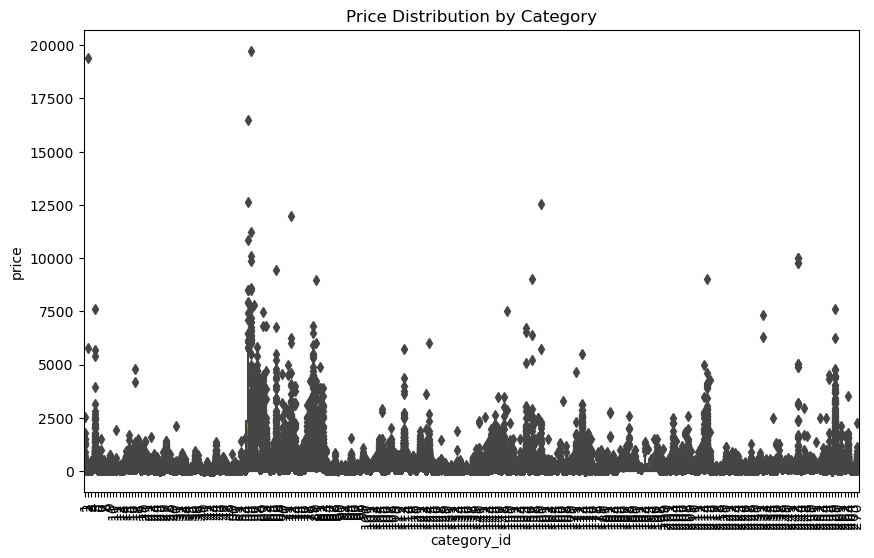

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x='category_id', y='price', data=merged_df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Category')
plt.show()

In [25]:
top_rated_product = merged_df.sort_values(by='stars', ascending=False).head(10)
top_rated_product[['title','stars','category_name']]

,title,stars,category_name
171648,"for Ford SUVs, Hummer H3 Spare Tire Cover, Spa...",5.0,Automotive Tires & Wheels
253470,Laurel Burch Cat Wishing Love 12x11 N/S Crossb...,5.0,Women's Handbags
927260,"Waterdrop WD-G3P800-N2RO Filter, Replacement f...",5.0,Kitchen & Bath Fixtures
253402,London West Mews - Stud - Small Phone Crossbody,5.0,Women's Handbags
253401,Ak Snap Closure Horsebit Logo Wallet,5.0,Women's Handbags
253397,Women Vegan Leather Cross Chest Bag Rivets Fri...,5.0,Women's Handbags
927273,"Kitchen Faucet Spray Head Replacement,Pull Dow...",5.0,Kitchen & Bath Fixtures
253391,Women Backpack PU Leather Mini Backpack Purse ...,5.0,Women's Handbags
927279,"3 Pack Shower Drain Stopper, Silicone Shower D...",5.0,Kitchen & Bath Fixtures
709737,Sale!! Foam Throwing Glider Airplane Aircraft ...,5.0,Toys & Games


In [25]:
print(merged_df_.columns)

Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'listPrice', 'category_id', 'isBestSeller', 'boughtInLastMonth', 'id',
       'category_name', 'percentage_discount'],
      dtype='object')


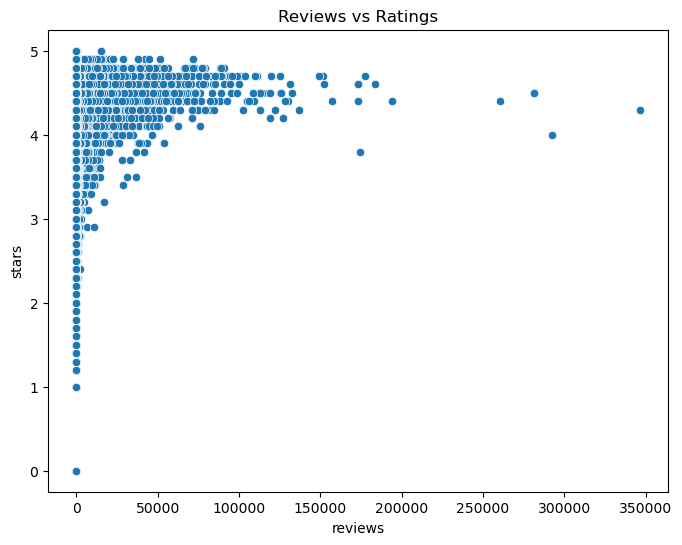

In [29]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='reviews', y='stars', data=merged_df)
plt.title('Reviews vs Ratings')
plt.show()

In [15]:
# Top 10 bestsellers sold in the last month

bestsellers_sold_lastmonth=bestsellers[bestsellers['boughtInLastMonth']> 0]
bestsellers_sold_lastmonth_category = bestsellers_sold_lastmonth.groupby('category_name').size().reset_index(name='Count')
bestsellers_sold_lastmonth_category.sort_values(by='Count', ascending=False).head(10)

,category_name,Count
167,Sports & Fitness,467
85,Industrial & Scientific,348
9,Automotive Replacement Parts,329
100,Kitchen & Dining,275
169,Sports & Outdoors,253
177,Toys & Games,228
193,Women's Clothing,159
175,Tools & Home Improvement,157
126,Outdoor Recreation,147
11,Automotive Tools & Equipment,141


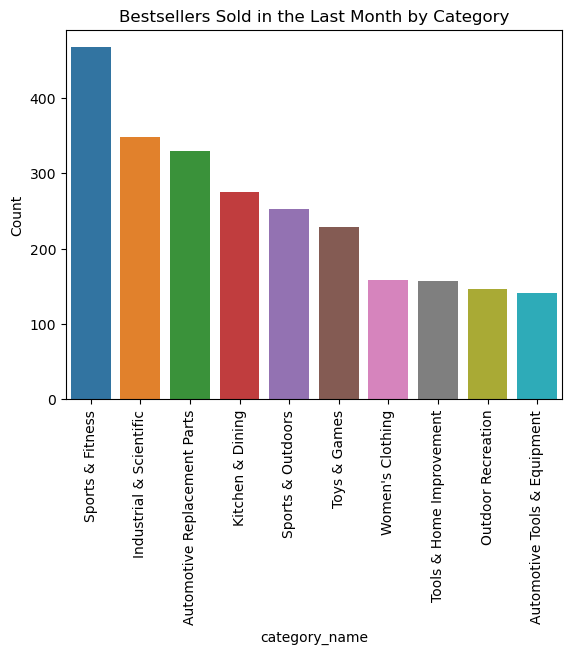

In [16]:
sns.barplot(x='category_name', y='Count', data=bestsellers_sold_lastmonth_category.sort_values(by='Count', ascending=False).head(10))
plt.xticks(rotation=90)
plt.title('Bestsellers Sold in the Last Month by Category')
plt.show()

In [45]:
top_15_category = merged_df_.groupby('category_name').agg({
'price': 'mean',
'percentage_discount': 'mean',
'stars': 'sum'}).reset_index()
top_50_category.sort_values(by='stars',ascending=False).head(10)

,category_name,price,percentage_discount,stars
136,Men's Shoes,82.407209,25.105190,31102.3
219,Toys & Games,28.181967,21.207001,28992.8
241,Women's Shoes,65.696677,27.777742,25919.1
238,Women's Clothing,32.844845,24.343760,25477.4
135,Men's Clothing,40.908143,23.693097,24329.9
77,Girls' Clothing,22.306041,24.213155,22847.3
93,Home Storage & Organization,39.805330,21.071234,22349.0
34,Boys' Clothing,22.740846,23.353553,22217.9
134,Men's Accessories,47.738884,22.035878,17444.3
239,Women's Handbags,55.152354,22.981552,17088.2


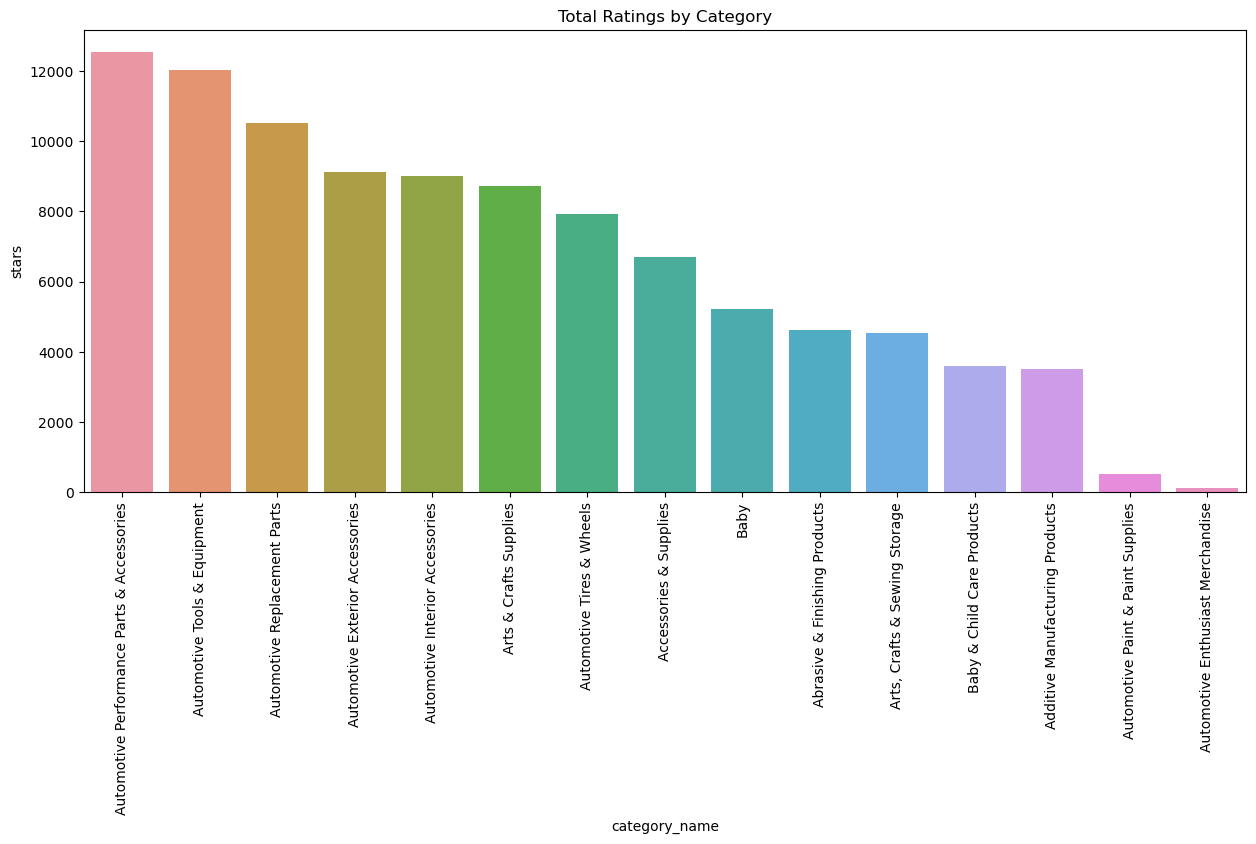

In [56]:
plt.figure(figsize=(15, 6))
sns.barplot(x='category_name', y='stars', data=top_15_category.head(15).sort_values(by='stars', ascending=False))
plt.xticks(rotation=90)
plt.title('Total Ratings by Category')
plt.show()

In [51]:
correlation_ratings_price=merged_df_['price'].corr(merged_df_['stars'])
print(f"The correlation between price and the ratings is {correlation_ratings_price}")

The correlation between price and the ratings is -0.06053670682854949


# Recommendations and Findings


In [ ]:
# Price Optimization Across Categories:
# Products in certain categories show a wide variance in pricing, which can confuse customers.Streamlining prices within categories or offering tiered pricing could help
# target different customer segments more effectively while maintaining clarity in product value.

# Focus on Ratings Over Reviews:
# Since products with fewer reviews but higher ratings still perform well, sellers should focus on improving product quality and customer satisfaction rather than merely increasing the number of reviews.
# Encouraging detailed, authentic reviews from satisfied customers can also boost trust.

# Strategize Discounts and Promotions:
# The data reveals varying levels of discounts across categories. Sellers could run strategic promotions in categories where customers are price-sensitive, 
# increasing conversions without necessarily hurting margins.

# Leverage Bestsellers for Upselling:
# Products marked as bestsellers tend to attract more attention. Sellers can use these products to promote related or complementary items,
# leveraging the popularity of bestsellers to drive upsell opportunities.

# Improve Visibility of Low-Reviewed High-Rated Products:
# Products with high ratings but low review counts may need more exposure. By highlighting these under-the-radar gems in advertising or recommendations, 
# sellers can draw more attention to high-quality products that are often overlooked.
